# Лабораторные работы по дисциплине "Методы, средства и технологии мультимедиа"

**Выполнила студентка гр. М8О-406Б-21 Волошинская Евгения Владимировна**

В качестве данных я выбрала датасет Bone Fracture Detection: Computer Vision Project (https://www.kaggle.com/datasets/pkdarabi/bone-fracture-detection-computer-vision-project).
Набор данных для обнаружения переломов костей - полезный ресурс для исследователей и разработчиков, которые хотят обучить модели машинного обучения, в частности алгоритмы обнаружения объектов, для автоматического обнаружения и классификации переломов костей на рентгеновских снимках. Цель создания этого набора данных - ускорить разработку решений в области компьютерного зрения для автоматического определения переломов, поддержать прогресс в медицинской диагностике и улучшить уход за пациентами.
Набор данных содержит изображения, разделенные на различные классы, каждый из которых представляет определенный тип перелома кости. К этим классам относятся «Положительный перелом локтя», «Положительный перелом пальцев», «Перелом предплечья», «Перелом плечевой кости», «Перелом плеча» и «Положительный перелом запястья».

Ключевые метрики качества:

* mAP@0.5 — средняя точность по всем классам при пороге IoU=0.5.
* mAP@0.5:0.95 — средняя точность по всем классам и IoU-порогам от 0.5 до 0.95.
* Precision (mean) — доля верно найденных объектов среди всех предсказанных.
* Recall (mean) — доля найденных объектов среди всех реальных объектов.
* IoU — степень пересечения предсказанного и истинного бокса.

Дополнительные возможные метрики:
* F1-score - для оценки баланса между precision и recall
* Confusion matrix - для анализа ошибок по конкретным типам переломов
* Specificity - важна в медицинских задачах для оценки ложных срабатываний

## Лабораторная работа №8: Проведение исследований моделями обнаружения и распознавания объектов

In [ ]:
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
# IMPORT KAGGLE DATA SOURCES
import kagglehub
pkdarabi_bone_fracture_detection_computer_vision_project_path = kagglehub.dataset_download('pkdarabi/bone-fracture-detection-computer-vision-project')

print('Data source import complete.')

Data source import complete.


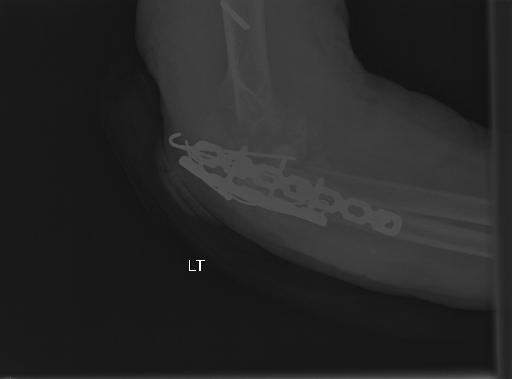

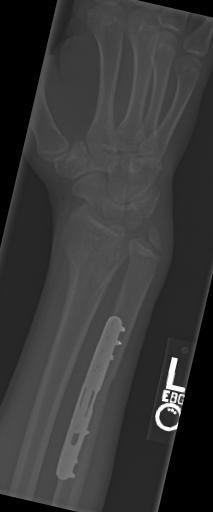

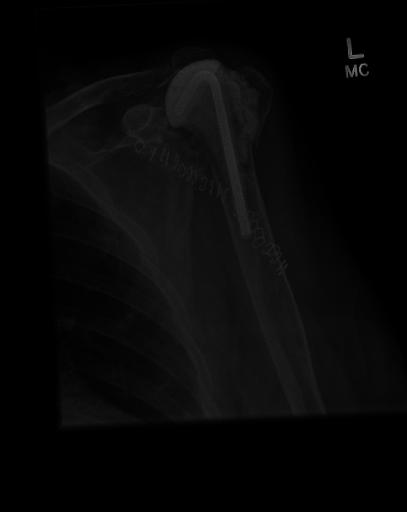

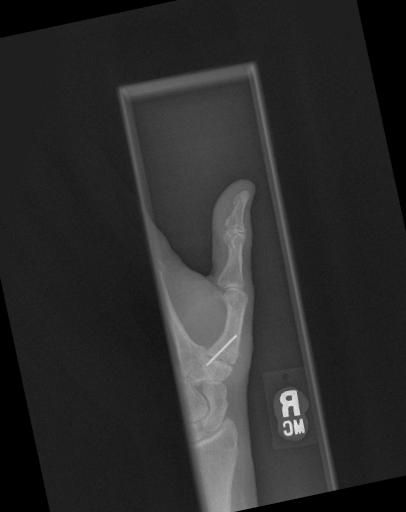

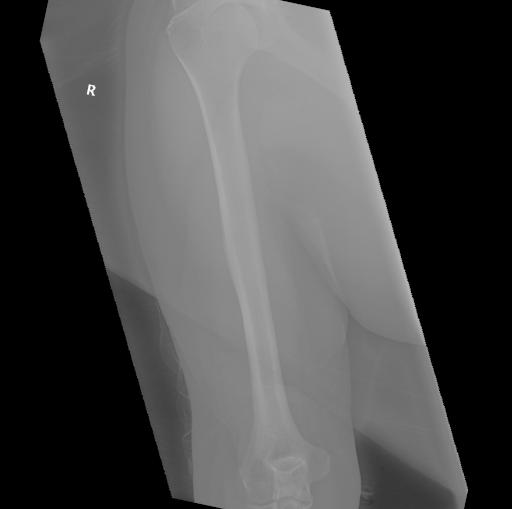

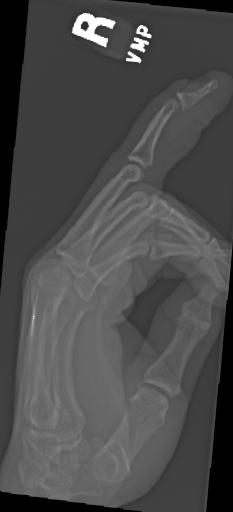

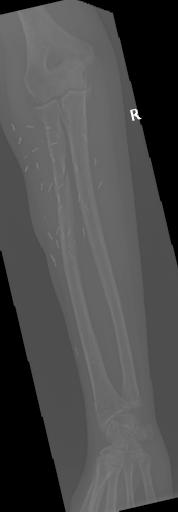

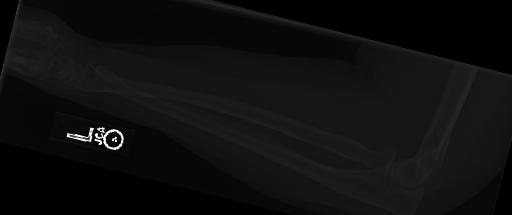

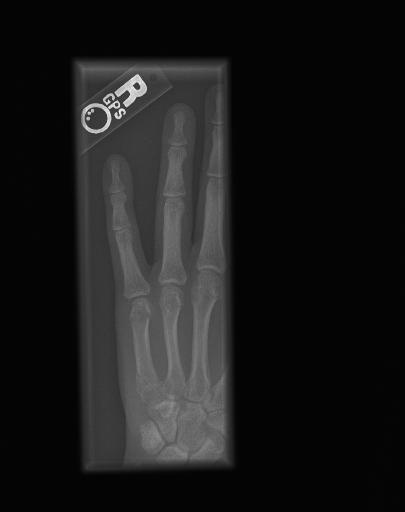

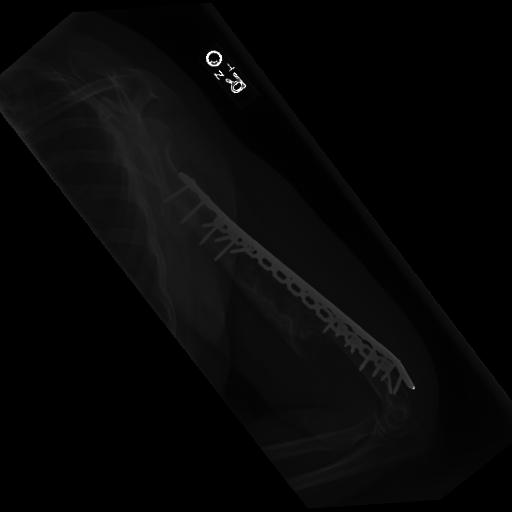

In [ ]:
# See the data
imgs_dir= "/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/train/images"

for file in os.listdir(imgs_dir)[:10]:
    img_path= os.path.join(imgs_dir, file)
    img= cv2.imread(img_path)

    cv2_imshow(img)

####Бейзлайн

In [ ]:
# Import packages
import cv2
import torch
import numpy as np
import os
from google.colab.patches import cv2_imshow
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO
# Train yolo v8
# Оптимизация: Используем YOLOv8n, уменьшаем размер батча, включаем FP16, ограничиваем количество эпох
model = YOLO('yolov8n.pt')  # Загрузка предобученной модели YOLOv8n

# Обучение модели
results = model.train(data='/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/data.yaml',
                     epochs=15,  # Ограничиваем количество эпох до 15
                     imgsz=640,  # Размер изображений
                     batch=8,  # Уменьшаем размер батча для экономии памяти
                     amp=True,  # Включаем amp для снижения потребления памяти
                     project='yolov8n_baseline', # Имя проекта для сохранения результатов
                     name='run1',
                     verbose=False) # Отключаем verbose, чтобы убрать прогресс-бар

# Получение результатов обучения
metrics = model.val()  # Оценка модели на валидационном наборе данных

# Validation
results = model.val()

# Test evaluation
results = model.predict(source='/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/test/images', conf= 0.25)

Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=run12, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pati

train: Scanning /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/train/labels... 3631 images, 1827 backgrounds, 0 corrupt: 100%|██████████| 3631/3631 [00:40<00:00, 89.53it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2.1±0.5 MB/s, size: 9.2 KB)


val: Scanning /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid/labels... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:03<00:00, 88.38it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid is not writeable, cache not saved.


Plotting labels to yolov8n_baseline/run12/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to yolov8n_baseline/run12
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      1.11G      2.774      7.271      2.311          8        640: 100%|██████████| 454/454 [01:18<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  5.00it/s]


                   all        348        204   0.000978      0.399    0.00264   0.000713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      1.45G      2.533      5.962      2.051          6        640: 100%|██████████| 454/454 [01:14<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  7.86it/s]

                   all        348        204      0.746     0.0318     0.0328     0.0111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      1.47G      2.459      4.887      1.988          6        640: 100%|██████████| 454/454 [01:14<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  7.70it/s]


                   all        348        204      0.446     0.0806     0.0493     0.0169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      1.48G      2.434      4.242      2.041         10        640: 100%|██████████| 454/454 [01:13<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  8.89it/s]


                   all        348        204     0.0782     0.0584     0.0407     0.0122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15       1.5G      2.319      3.814      1.956          8        640: 100%|██████████| 454/454 [01:14<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.04it/s]

                   all        348        204        0.4      0.107     0.0715     0.0292


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      1.52G      2.263      3.802      2.039          5        640: 100%|██████████| 454/454 [01:10<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.89it/s]

                   all        348        204      0.172      0.127     0.0932     0.0306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      1.54G       2.24      3.504      2.048          5        640: 100%|██████████| 454/454 [01:07<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  8.25it/s]


                   all        348        204       0.13      0.215      0.108     0.0358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      1.55G      2.156      3.244      1.976          5        640: 100%|██████████| 454/454 [01:07<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.60it/s]

                   all        348        204      0.191      0.171      0.125     0.0435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      1.57G       2.13      3.114      1.979          4        640: 100%|██████████| 454/454 [01:06<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.60it/s]

                   all        348        204      0.234       0.22      0.162     0.0591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      1.59G       2.09       2.92      1.944          2        640: 100%|██████████| 454/454 [01:06<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  7.84it/s]

                   all        348        204      0.235      0.273      0.192     0.0684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15       1.6G      2.024      2.728      1.883          2        640: 100%|██████████| 454/454 [01:06<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.42it/s]


                   all        348        204      0.277      0.243      0.204     0.0791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      1.62G      1.962      2.585      1.847          6        640: 100%|██████████| 454/454 [01:07<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.80it/s]

                   all        348        204      0.339      0.319      0.255     0.0927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      1.64G      1.931      2.504      1.818          4        640: 100%|██████████| 454/454 [01:06<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.95it/s]


                   all        348        204      0.313      0.272      0.254     0.0903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      1.65G      1.901      2.395      1.811          3        640: 100%|██████████| 454/454 [01:06<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.61it/s]


                   all        348        204      0.359      0.289      0.258     0.0994

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      1.67G      1.825      2.225      1.747          5        640: 100%|██████████| 454/454 [01:07<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.82it/s]


                   all        348        204      0.315      0.361      0.267      0.099

15 epochs completed in 0.303 hours.
Optimizer stripped from yolov8n_baseline/run12/weights/last.pt, 6.2MB
Optimizer stripped from yolov8n_baseline/run12/weights/best.pt, 6.2MB

Validating yolov8n_baseline/run12/weights/best.pt...
Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.89it/s]


                   all        348        204      0.318      0.361      0.267     0.0982
Speed: 0.4ms preprocess, 2.7ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to yolov8n_baseline/run12
Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 38.3±15.1 MB/s, size: 10.4 KB)


val: Scanning /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid/labels... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:00<00:00, 602.17it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:03<00:00, 12.48it/s]


                   all        348        204      0.327      0.357      0.269     0.0997
Speed: 0.7ms preprocess, 6.0ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to yolov8n_baseline/run122

Validation Results:


AttributeError: 'DetMetrics' object has no attribute 'precision'. See valid attributes below.

    Utility class for computing detection metrics such as precision, recall, and mean average precision (mAP).

    Attributes:
        save_dir (Path): A path to the directory where the output plots will be saved.
        plot (bool): A flag that indicates whether to plot precision-recall curves for each class.
        names (dict): A dictionary of class names.
        box (Metric): An instance of the Metric class for storing detection results.
        speed (dict): A dictionary for storing execution times of different parts of the detection process.
        task (str): The task type, set to 'detect'.
    

In [ ]:
# Вывод метрик (обращение к атрибутам, а не к методам)
print("\nValidation Results:")
print(f"  mAP@0.5: {metrics.box.map50:.4f}")
print(f"  mAP@0.5:0.95: {metrics.box.map:.4f}")
print(f"  Precision (mean): {metrics.box.mp:.4f}")
print(f"  Recall (mean): {metrics.box.mr:.4f}")

# Получение IoU вручную
tp = sum([v[0] for v in metrics.box.all_ap])  # True Positives
fp = sum([v[1] for v in metrics.box.all_ap])  # False Positives
fn = sum([v[2] for v in metrics.box.all_ap])  # False Negatives

iou = tp / (tp + fp + fn) if (tp + fp + fn) > 0 else 0
print(f"  IoU (ручной расчет): {iou:.4f}")


Validation Results:
  mAP@0.5: 0.2687
  mAP@0.5:0.95: 0.0997
  Precision (mean): 0.3272
  Recall (mean): 0.3570
  IoU (ручной расчет): 0.3937


####Улучшенный бейзлайн

Гипотезы:


In [ ]:
# Импорты
import kagglehub
from ultralytics import YOLO

# Загрузка датасета
dataset_path = pkdarabi_bone_fracture_detection_computer_vision_project_path
print(f"Dataset path: {dataset_path}")

# Путь к data.yaml
data_yaml = f"{dataset_path}/BoneFractureYolo8/data.yaml"

# Загрузка модели YOLOv8n
model = YOLO('yolov8n.pt')  # Предобученная модель

# Обучение с улучшениями (без class_weights)
results = model.train(
    data=data_yaml,
    epochs=15,
    imgsz=640,
    batch=8,
    amp=True,
    optimizer='AdamW',
    lr0=0.001,
    lrf=0.0001,
    cos_lr=True,
    warmup_epochs=3,
    mosaic=1.0,
    copy_paste=0.3,
    mixup=0.2,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=10,
    translate=0.1,
    scale=0.1,
    flipud=0.5,
    close_mosaic=10,
    val=True,
    project='yolov8n_improved',
    name='run1',
    verbose=False,
    patience=10,
    label_smoothing=0.1  # Альтернатива class_weights
)

# Валидация модели
metrics = model.val()

Dataset path: /kaggle/input/bone-fracture-detection-computer-vision-project
WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.3, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/data.yaml, degrees=10, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.0001, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model

100%|██████████| 755k/755k [00:00<00:00, 26.4MB/s]

Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,012,213 parameters, 3,012,197 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 85.0MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3.7±1.6 MB/s, size: 12.1 KB)


train: Scanning /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/train/labels... 3631 images, 1827 backgrounds, 0 corrupt: 100%|██████████| 3631/3631 [00:24<00:00, 150.91it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2.8±0.8 MB/s, size: 9.2 KB)


val: Scanning /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid/labels... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:02<00:00, 143.67it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid is not writeable, cache not saved.


Plotting labels to yolov8n_improved/run1/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to yolov8n_improved/run1
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      1.11G      2.267      4.585      2.175         10        640: 100%|██████████| 454/454 [01:42<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.35it/s]

                   all        348        204     0.0028      0.232    0.00333    0.00088



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      1.45G      2.123      3.929      2.048         12        640: 100%|██████████| 454/454 [01:38<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.14it/s]

                   all        348        204      0.442     0.0116     0.0172    0.00576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      1.47G      2.064      3.678      1.996          9        640: 100%|██████████| 454/454 [01:39<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  7.70it/s]


                   all        348        204      0.293     0.0658     0.0462      0.017

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      1.48G      2.041      3.591      1.968          9        640: 100%|██████████| 454/454 [01:38<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  8.31it/s]

                   all        348        204      0.931      0.046      0.079     0.0309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15       1.5G      1.987      3.439      1.904          9        640: 100%|██████████| 454/454 [01:40<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  8.81it/s]

                   all        348        204      0.841     0.0733     0.0929     0.0392


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      1.52G      2.379      3.787      2.271          5        640: 100%|██████████| 454/454 [01:11<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.10it/s]


                   all        348        204      0.179      0.108     0.0777      0.031

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      1.54G      2.316       3.49      2.228          5        640: 100%|██████████| 454/454 [01:09<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.56it/s]


                   all        348        204      0.278      0.132     0.0895     0.0348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      1.55G      2.254      3.296      2.194          5        640: 100%|██████████| 454/454 [01:08<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.49it/s]


                   all        348        204      0.299      0.144       0.11     0.0436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      1.57G      2.204      3.129       2.13          4        640: 100%|██████████| 454/454 [01:09<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  8.28it/s]


                   all        348        204      0.236      0.162      0.122     0.0515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      1.59G      2.152      3.002      2.109          2        640: 100%|██████████| 454/454 [01:09<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.31it/s]

                   all        348        204      0.151      0.207      0.151     0.0626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15       1.6G      2.105      2.772      2.082          2        640: 100%|██████████| 454/454 [01:10<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.53it/s]


                   all        348        204      0.201      0.238      0.167     0.0647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      1.62G      2.045      2.626      2.044          6        640: 100%|██████████| 454/454 [01:09<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.78it/s]

                   all        348        204       0.27      0.197      0.186     0.0714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      1.64G      2.011      2.579       2.01          4        640: 100%|██████████| 454/454 [01:09<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  8.80it/s]


                   all        348        204      0.218      0.221       0.18     0.0722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      1.65G      1.981      2.482       1.99          3        640: 100%|██████████| 454/454 [01:10<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.07it/s]

                   all        348        204      0.208      0.227      0.187     0.0765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      1.67G      1.957      2.414      1.967          5        640: 100%|██████████| 454/454 [01:09<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  8.31it/s]

                   all        348        204      0.209      0.245      0.191     0.0779



15 epochs completed in 0.346 hours.
Optimizer stripped from yolov8n_improved/run1/weights/last.pt, 6.2MB
Optimizer stripped from yolov8n_improved/run1/weights/best.pt, 6.2MB

Validating yolov8n_improved/run1/weights/best.pt...
Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.67it/s]


                   all        348        204      0.205      0.237      0.192      0.078
Speed: 0.3ms preprocess, 2.7ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to yolov8n_improved/run1
Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 22.2±20.1 MB/s, size: 10.4 KB)


val: Scanning /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid/labels... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:00<00:00, 479.06it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:04<00:00,  9.27it/s]


                   all        348        204      0.203       0.26      0.193     0.0764
Speed: 0.8ms preprocess, 7.3ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to yolov8n_improved/run12


In [ ]:
# Вывод метрик
print("\nValidation Results (Improved):")
print(f"  mAP@0.5: {metrics.box.map50:.4f}")
print(f"  mAP@0.5:0.95: {metrics.box.map:.4f}")
print(f"  Precision (mean): {metrics.box.mp:.4f}")
print(f"  Recall (mean): {metrics.box.mr:.4f}")

# Расчет IoU вручную
tp = sum([v[0] for v in metrics.box.all_ap])  # True Positives
fp = sum([v[1] for v in metrics.box.all_ap])  # False Positives
fn = sum([v[2] for v in metrics.box.all_ap])  # False Negatives
iou = tp / (tp + fp + fn) if (tp + fp + fn) > 0 else 0
print(f"  IoU (ручной расчет): {iou:.4f}")


Validation Results (Improved):
  mAP@0.5: 0.1926
  mAP@0.5:0.95: 0.0764
  Precision (mean): 0.2028
  Recall (mean): 0.2600
  IoU (ручной расчет): 0.3906


К сожалению, видим ухудшение всех метрик.

Возможные причины снижения производительности:
- Слишком агрессивные аугментации и сильное сглаживание меток (label smoothing) ухудшили обучение на небольшом или не очень разнообразном датасете.
- AdamW оптимизатор мог быть нестабильным с выбранными параметрами. AdamW не всегда лучше SGD для detection.

Вторая итерация изменений. Уменьшена сила аугментаций, уменьшена интенсивность mosaic, copy-paste, mixup, отключен label smoothing, снова используется оптимизатор SGD


In [ ]:
# Обучение с откатом изменений
results = model.train(
    data=data_yaml,
    epochs=15,
    imgsz=640,
    batch=8,
    amp=True,
    optimizer='SGD',
    lr0=0.01,
    lrf=0.01,
    cos_lr=False,
    warmup_epochs=1,
    mosaic=0.5,
    copy_paste=0.1,
    mixup=0.1,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=10,
    translate=0.1,
    scale=0.1,
    flipud=0.0,
    close_mosaic=0,
    val=True,
    label_smoothing=0.0,
    project='yolov8n_fixed',
    name='run1',
    verbose=False,
    patience=10
)

WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=0, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/data.yaml, degrees=10, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=0.5, multi_scale=False, name=run1, nbs=64, 

train: Scanning /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/train/labels... 3631 images, 1827 backgrounds, 0 corrupt: 100%|██████████| 3631/3631 [00:05<00:00, 640.08it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 29.6±8.8 MB/s, size: 9.2 KB)


val: Scanning /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid/labels... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:00<00:00, 570.42it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid is not writeable, cache not saved.


Plotting labels to yolov8n_fixed/run1/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to yolov8n_fixed/run1
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      1.24G      2.668      4.562      2.454          8        640: 100%|██████████| 454/454 [01:27<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  8.82it/s]

                   all        348        204      0.479     0.0829     0.0709     0.0267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      1.52G       2.46       4.05      2.255          7        640: 100%|██████████| 454/454 [01:24<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  8.66it/s]


                   all        348        204      0.761     0.0849     0.0767     0.0268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      1.52G      2.323      3.671      2.157          1        640: 100%|██████████| 454/454 [01:20<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  7.15it/s]

                   all        348        204      0.104      0.151     0.0877      0.036



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      1.52G      2.286      3.562      2.105          6        640: 100%|██████████| 454/454 [01:22<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.11it/s]

                   all        348        204      0.195       0.13      0.119     0.0424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      1.52G      2.246       3.36      2.081          7        640: 100%|██████████| 454/454 [01:20<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.26it/s]

                   all        348        204       0.31      0.132      0.139     0.0532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      1.52G      2.206      3.194      2.037          2        640: 100%|██████████| 454/454 [01:21<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  8.67it/s]

                   all        348        204      0.217      0.222      0.156     0.0582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      1.52G      2.171      3.097      2.023          4        640: 100%|██████████| 454/454 [01:22<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.37it/s]

                   all        348        204      0.221      0.197      0.182     0.0659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      1.52G      2.119      2.955      1.988          5        640: 100%|██████████| 454/454 [01:21<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  8.73it/s]


                   all        348        204      0.247      0.218      0.185     0.0741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      1.52G      2.078      2.869      1.939          7        640: 100%|██████████| 454/454 [01:23<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.04it/s]

                   all        348        204      0.225      0.215      0.202     0.0792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      1.52G      2.024      2.712      1.907          7        640: 100%|██████████| 454/454 [01:22<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.12it/s]

                   all        348        204      0.241       0.19      0.187     0.0729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      1.52G      1.986       2.61      1.894          7        640: 100%|██████████| 454/454 [01:24<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  8.72it/s]


                   all        348        204      0.294      0.258       0.22     0.0773

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      1.52G      1.929      2.497      1.843          5        640: 100%|██████████| 454/454 [01:23<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  8.88it/s]

                   all        348        204      0.266      0.263      0.224     0.0964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      1.52G      1.878      2.389      1.803          5        640: 100%|██████████| 454/454 [01:22<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.25it/s]


                   all        348        204      0.352      0.258      0.234     0.0863

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      1.52G      1.875       2.32      1.809          8        640: 100%|██████████| 454/454 [01:21<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  8.94it/s]

                   all        348        204       0.32      0.244      0.226     0.0897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      1.52G      1.828      2.225      1.778          3        640: 100%|██████████| 454/454 [01:24<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.09it/s]


                   all        348        204      0.312      0.283      0.236     0.0908

15 epochs completed in 0.358 hours.
Optimizer stripped from yolov8n_fixed/run1/weights/last.pt, 6.2MB
Optimizer stripped from yolov8n_fixed/run1/weights/best.pt, 6.2MB

Validating yolov8n_fixed/run1/weights/best.pt...
Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.13it/s]


                   all        348        204      0.267      0.259      0.225     0.0965
Speed: 0.3ms preprocess, 2.7ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to yolov8n_fixed/run1


In [ ]:

# Валидация модели
metrics = model.val()
# Вывод метрик
print("\nValidation Results (Improved):")
print(f"  mAP@0.5: {metrics.box.map50:.4f}")
print(f"  mAP@0.5:0.95: {metrics.box.map:.4f}")
print(f"  Precision (mean): {metrics.box.mp:.4f}")
print(f"  Recall (mean): {metrics.box.mr:.4f}")

# Расчет IoU вручную
tp = sum([v[0] for v in metrics.box.all_ap])  # True Positives
fp = sum([v[1] for v in metrics.box.all_ap])  # False Positives
fn = sum([v[2] for v in metrics.box.all_ap])  # False Negatives
iou = tp / (tp + fp + fn) if (tp + fp + fn) > 0 else 0
print(f"  IoU (ручной расчет): {iou:.4f}")

Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 30.4±14.9 MB/s, size: 10.4 KB)


val: Scanning /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid/labels... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:00<00:00, 669.67it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:04<00:00,  9.46it/s]


                   all        348        204      0.276      0.259       0.23     0.0977
Speed: 1.7ms preprocess, 4.5ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to yolov8n_fixed/run12

Validation Results (Improved):
  mAP@0.5: 0.2298
  mAP@0.5:0.95: 0.0977
  Precision (mean): 0.2756
  Recall (mean): 0.2593
  IoU (ручной расчет): 0.3689


Хотя метрики улучшились по сравнению с первой улучшенной версией, они все равно не дотягивают до исходного бейзлайна. Это может быть связано с тем, что даже небольшие изменения в аугментациях и гиперпараметрах могут негативно сказаться на небольших медицинских датасетах, где важно не "перемешивать" данные слишком сильно. Также возможно, что оптимальные параметры для YOLOv8 уже подобраны в стандартном бейзлайне.

####Самостоятельная реализация

Пути

train_images_path = "/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/train/images"
train_labels_path = "/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/train/labels"
val_images_path   = "/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/valid/images"
val_labels_path   = "/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/valid/labels"
test_images_path  = "/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/test/images"

In [ ]:
# ========== 0. Импорт необходимых библиотек ==========
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
import matplotlib.pyplot as plt
from tqdm import tqdm

# Используем GPU, если доступно
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

first_token_is_class = True

# Из data.yaml: число классов = 7
num_classes = 7


# ========== 1. датасет ==========
class BoneFractureDataset(Dataset):
    def __init__(self, images_path, labels_path, transform=None, S=7):
        self.images_path = images_path
        self.labels_path = labels_path
        self.transform = transform
        self.image_files = sorted(os.listdir(images_path))
        self.S = S

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_filename = self.image_files[idx]
        img_path = os.path.join(self.images_path, img_filename)
        img = cv2.imread(img_path)
        if img is None:
            raise ValueError(f"Не удалось загрузить изображение: {img_path}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        if self.transform:
            img = self.transform(img)
        else:
            transform_ops = T.Compose([
                T.ToPILImage(),
                T.Resize((640, 640)),
                T.ToTensor(),
            ])
            img = transform_ops(img)

        label_filename = os.path.splitext(img_filename)[0] + ".txt"
        label_path = os.path.join(self.labels_path, label_filename)
        boxes = []
        classes = []
        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                for line in f.readlines():
                    parts = line.strip().split()
                    if len(parts) == 9:
                        if first_token_is_class:
                            cls = int(parts[0])  # Если токены 0-индексированы

                        else:
                            cls = 0
                        if cls < 0 or cls >= num_classes:
                            print(f"Warning: encountered class {parts[0]} converted to {cls} out of range. Skipping annotation.")
                            continue
                        x1 = float(parts[1])
                        y1 = float(parts[2])
                        w1 = float(parts[3])
                        h1 = float(parts[4])
                        x2 = float(parts[5])
                        y2 = float(parts[6])
                        w2 = float(parts[7])
                        h2 = float(parts[8])
                        xmin1 = x1 - w1/2.
                        ymin1 = y1 - h1/2.
                        xmax1 = x1 + w1/2.
                        ymax1 = y1 + h1/2.
                        xmin2 = x2 - w2/2.
                        ymin2 = y2 - h2/2.
                        xmax2 = x2 + w2/2.
                        ymax2 = y2 + h2/2.
                        union_xmin = min(xmin1, xmin2)
                        union_ymin = min(ymin1, ymin2)
                        union_xmax = max(xmax1, xmax2)
                        union_ymax = max(ymax1, ymax2)
                        union_x = (union_xmin + union_xmax) / 2.
                        union_y = (union_ymin + union_ymax) / 2.
                        union_w = union_xmax - union_xmin
                        union_h = union_ymax - union_ymin
                        boxes.append([union_x, union_y, union_w, union_h])
                        classes.append(cls)
                    elif len(parts) == 5:
                        if first_token_is_class:
                            cls = int(parts[0])
                        else:
                            cls = 0
                        if cls < 0 or cls >= num_classes:
                            print(f"Warning: encountered class {parts[0]} converted to {cls} out of range. Skipping annotation.")
                            continue
                        boxes.append([float(parts[1]), float(parts[2]), float(parts[3]), float(parts[4])])
                        classes.append(cls)
                    else:
                        continue

        target = encode_target(boxes, classes, S=self.S, B=2, num_classes=num_classes)
        return img, target


def encode_target(boxes, classes, S=7, B=2, num_classes=7):
    target_tensor = torch.zeros((S, S, B*5 + num_classes))
    for box, cls in zip(boxes, classes):
        if cls < 0 or cls >= num_classes:
            continue
        x_center, y_center, w, h = box
        cell_i = int(x_center * S)
        cell_j = int(y_center * S)
        cell_i = min(cell_i, S - 1)
        cell_j = min(cell_j, S - 1)
        cell_size = 1.0 / S
        x_cell = (x_center - cell_i * cell_size) / cell_size
        y_cell = (y_center - cell_j * cell_size) / cell_size

        if target_tensor[cell_j, cell_i, 0] == 0:
            target_tensor[cell_j, cell_i, 0] = 1.0
            target_tensor[cell_j, cell_i, 1:5] = torch.tensor([x_cell, y_cell, w, h])
            one_hot = torch.zeros(num_classes)
            one_hot[cls] = 1.0
            target_tensor[cell_j, cell_i, B*5:] = one_hot
    return target_tensor


# ========== 3. Модель (упрощённая YOLOv1) ==========
class YOLOv1(nn.Module):
    def __init__(self, S=7, B=2, num_classes=7):
        super(YOLOv1, self).__init__()
        self.S = S
        self.B = B
        self.num_classes = num_classes
        self.out_dim = B*5 + num_classes

        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(512, 1024, kernel_size=3, padding=1),
            nn.BatchNorm2d(1024),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1024*5*5, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, S * S * self.out_dim)
        )

    def forward(self, x):
        batch_size = x.size(0)
        x = self.features(x)
        x = self.fc(x)
        x = x.view(batch_size, self.S, self.S, self.out_dim)
        return x


# ========== 4. Функция потерь (упрощенная YOLOv1 loss) ==========
class YoloLoss(nn.Module):
    def __init__(self, S=7, B=2, num_classes=7, lambda_coord=5, lambda_noobj=0.5):
        super(YoloLoss, self).__init__()
        self.mse = nn.MSELoss(reduction="sum")
        self.S = S
        self.B = B
        self.num_classes = num_classes
        self.lambda_coord = lambda_coord
        self.lambda_noobj = lambda_noobj

    def forward(self, predictions, target):
        obj_mask = target[..., 0] > 0
        noobj_mask = target[..., 0] == 0

        coord_loss = self.mse(predictions[obj_mask][:, 1:5], target[obj_mask][:, 1:5])
        conf_loss_obj = self.mse(predictions[obj_mask][:, 0], target[obj_mask][:, 0])
        conf_loss_noobj = self.mse(predictions[noobj_mask][:, 0], target[noobj_mask][:, 0])
        class_pred = predictions[obj_mask][..., 10:]
        class_target = target[obj_mask][..., 10:]
        class_loss = self.mse(class_pred, class_target)

        total_loss = (self.lambda_coord * coord_loss +
                      conf_loss_obj +
                      self.lambda_noobj * conf_loss_noobj +
                      class_loss)
        return total_loss


# ========== 5. Функция декодирования предсказаний ==========
def decode_predictions(pred, S=7, B=2, conf_threshold=0.25):
    boxes = []
    cell_size = 1.0 / S
    for i in range(S):
        for j in range(S):
            cell_pred = pred[j, i]
            conf = cell_pred[0].item()
            if conf < conf_threshold:
                continue
            x_cell, y_cell, w, h = cell_pred[1:5].detach().cpu().numpy()
            x_center = (i + x_cell) * cell_size
            y_center = (j + y_cell) * cell_size
            class_probs = cell_pred[10:10+num_classes]
            class_id = int(torch.argmax(class_probs).item())
            boxes.append([x_center, y_center, w, h, conf, class_id])
    return boxes


# ========== 6. Функция вычисления IoU ==========
def bbox_iou(box1, box2):
    def to_corners(box):
        x, y, w, h = box
        return x - w/2., y - h/2., x + w/2., y + h/2.
    xmin1, ymin1, xmax1, ymax1 = to_corners(box1)
    xmin2, ymin2, xmax2, ymax2 = to_corners(box2)

    inter_xmin = max(xmin1, xmin2)
    inter_ymin = max(ymin1, ymin2)
    inter_xmax = min(xmax1, xmax2)
    inter_ymax = min(ymax1, ymax2)
    inter_area = max(inter_xmax - inter_xmin, 0) * max(inter_ymax - inter_ymin, 0)

    area1 = (xmax1 - xmin1) * (ymax1 - ymin1)
    area2 = (xmax2 - xmin2) * (ymax2 - ymin2)
    union = area1 + area2 - inter_area + 1e-6
    return inter_area / union


# ========== 7. Функция оценки модели ==========
def evaluate(model, dataloader, S=7, conf_threshold=0.25, iou_threshold=0.5):
    model.eval()
    all_tp = {i: 0 for i in range(num_classes)}
    all_fp = {i: 0 for i in range(num_classes)}
    all_fn = {i: 0 for i in range(num_classes)}
    iou_sum = 0
    iou_count = 0

    with torch.no_grad():
        for imgs, targets in tqdm(dataloader, desc="Evaluation"):
            imgs = imgs.to(device)
            outputs = model(imgs)

            for b in range(imgs.size(0)):
                pred = outputs[b]
                pred_boxes = decode_predictions(pred, S=S, conf_threshold=conf_threshold)
                gt_boxes = []

                # Декодируем ground truth боксы
                for i in range(S):
                    for j in range(S):
                        if targets[b, j, i, 0] > 0:
                            x_cell = targets[b, j, i, 1].item()
                            y_cell = targets[b, j, i, 2].item()
                            w = targets[b, j, i, 3].item()
                            h = targets[b, j, i, 4].item()
                            cls = torch.argmax(targets[b, j, i, 10:10+num_classes]).item()

                            # Конвертируем в абсолютные координаты
                            cell_size = 1.0 / S
                            x_center = (i + x_cell) * cell_size
                            y_center = (j + y_cell) * cell_size
                            gt_boxes.append([x_center, y_center, w, h, cls])

                # Сопоставляем предсказания с ground truth
                matched_gt = set()
                for pb in pred_boxes:
                    p_box = pb[:4]
                    p_conf = pb[4]
                    p_class = pb[5]
                    best_iou = 0
                    best_gt_idx = -1

                    for idx, gt in enumerate(gt_boxes):
                        if gt[4] != p_class:
                            continue
                        iou = bbox_iou(p_box, gt[:4])
                        if iou > best_iou:
                            best_iou = iou
                            best_gt_idx = idx

                    if best_iou >= iou_threshold and best_gt_idx not in matched_gt:
                        all_tp[p_class] += 1
                        matched_gt.add(best_gt_idx)
                        iou_sum += best_iou
                        iou_count += 1
                    else:
                        all_fp[p_class] += 1

                # Несопоставленные ground truth - это false negatives
                for idx, gt in enumerate(gt_boxes):
                    if idx not in matched_gt:
                        all_fn[gt[4]] += 1

    # Вычисляем метрики
    precisions = []
    recalls = []
    for cls in range(num_classes):
        tp = all_tp[cls]
        fp = all_fp[cls]
        fn = all_fn[cls]
        precision = tp / (tp + fp + 1e-6)
        recall = tp / (tp + fn + 1e-6)
        precisions.append(precision)
        recalls.append(recall)

    mean_precision = np.mean(precisions)
    mean_recall = np.mean(recalls)
    mean_iou = (iou_sum / iou_count) if iou_count > 0 else 0.0

    print(f"\nMetrics @ IoU={iou_threshold}:")
    print(f"Mean Precision: {mean_precision:.4f}")
    print(f"Mean Recall: {mean_recall:.4f}")
    print(f"Mean IoU (TP): {mean_iou:.4f}")

    return mean_precision, mean_recall, mean_iou

# ========== 8. Подготовка данных и обучение ==========
# Пути к данным
train_images_path = "/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/train/images"
train_labels_path = "/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/train/labels"
val_images_path = "/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/valid/images"
val_labels_path = "/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/valid/labels"
test_images_path = "/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/test/images"

# Трансформы
transform = T.Compose([
    T.ToPILImage(),
    T.Resize((640, 640)),
    T.ToTensor(),
])

# Датасеты и даталоадеры
train_dataset = BoneFractureDataset(train_images_path, train_labels_path, transform=transform)
val_dataset = BoneFractureDataset(val_images_path, val_labels_path, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=2)

# Инициализация модели
model = YOLOv1(S=7, B=2, num_classes=num_classes).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4)
criterion = YoloLoss(S=7, B=2, num_classes=num_classes)

# Обучение
num_epochs = 15
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for imgs, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        imgs = imgs.to(device)
        targets = targets.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Валидация
    val_loss = 0.0
    model.eval()
    with torch.no_grad():
        for imgs, targets in val_loader:
            imgs = imgs.to(device)
            targets = targets.to(device)
            outputs = model(imgs)
            val_loss += criterion(outputs, targets).item()

    print(f"Epoch {epoch+1} | Train Loss: {running_loss/len(train_loader):.4f} | Val Loss: {val_loss/len(val_loader):.4f}")

    # Оценка на валидации
    if (epoch+1) % 5 == 0:
        evaluate(model, val_loader)

# ========== 9. Тестирование модели (визуализация результата) ==========
def predict_and_show(model, img_path, S=7, conf_threshold=0.25):
    model.eval()
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError(f"Не удалось загрузить изображение: {img_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    orig = img_rgb.copy()

    transform_ops = T.Compose([
        T.ToPILImage(),
        T.Resize((640, 640)),
        T.ToTensor(),
    ])
    img_tensor = transform_ops(img_rgb).unsqueeze(0).to(device)

    with torch.no_grad():
        out = model(img_tensor)[0]
    boxes = decode_predictions(out, S=S, conf_threshold=conf_threshold)

    for bx in boxes:
        x_center, y_center, bw, bh, conf, cls = bx
        x_center_abs = int(x_center * 640)
        y_center_abs = int(y_center * 640)
        bw_abs = int(bw * 640)
        bh_abs = int(bh * 640)
        xmin = int(x_center_abs - bw_abs / 2)
        ymin = int(y_center_abs - bh_abs / 2)
        xmax = int(x_center_abs + bw_abs / 2)
        ymax = int(y_center_abs + bh_abs / 2)

        cv2.rectangle(orig, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
        cv2.putText(orig, f"Cls:{cls} Conf:{conf:.2f}", (xmin, max(ymin-10, 0)),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    plt.figure(figsize=(8,8))
    plt.imshow(orig)
    plt.axis("off")
    plt.show()

# Проверка на тестовых изображениях
test_images = os.listdir(test_images_path)
if len(test_images) > 0:
    test_img_path = os.path.join(test_images_path, test_images[0])
    print("Показываем результат на тестовом изображении:", test_img_path)
    predict_and_show(model, test_img_path, S=7, conf_threshold=0.25)
else:
    print("В тестовой папке нет изображений.")

Using device: cuda


Epoch 1/15: 100%|██████████| 454/454 [01:29<00:00,  5.05it/s]


Epoch 1 | Train Loss: 16.8703 | Val Loss: 15.0846


Epoch 2/15: 100%|██████████| 454/454 [01:26<00:00,  5.22it/s]


Epoch 2 | Train Loss: 6.0934 | Val Loss: 13.7977


Epoch 3/15: 100%|██████████| 454/454 [01:27<00:00,  5.20it/s]


Epoch 3 | Train Loss: 5.4946 | Val Loss: 12.0199


Epoch 4/15: 100%|██████████| 454/454 [01:25<00:00,  5.31it/s]


Epoch 4 | Train Loss: 5.0965 | Val Loss: 12.2182


Epoch 5/15: 100%|██████████| 454/454 [01:25<00:00,  5.30it/s]


Epoch 5 | Train Loss: 5.1758 | Val Loss: 11.9084


Evaluation: 100%|██████████| 44/44 [00:06<00:00,  7.26it/s]



Metrics @ IoU=0.5:
Mean Precision: 0.0000
Mean Recall: 0.0000
Mean IoU (TP): 0.0000


Epoch 6/15: 100%|██████████| 454/454 [01:25<00:00,  5.32it/s]


Epoch 6 | Train Loss: 5.0884 | Val Loss: 11.8819


Epoch 7/15: 100%|██████████| 454/454 [01:20<00:00,  5.66it/s]


Epoch 7 | Train Loss: 4.7000 | Val Loss: 11.3272


Epoch 8/15: 100%|██████████| 454/454 [01:21<00:00,  5.60it/s]


Epoch 8 | Train Loss: 4.8388 | Val Loss: 11.5025


Epoch 9/15: 100%|██████████| 454/454 [01:32<00:00,  4.91it/s]


Epoch 9 | Train Loss: 4.8835 | Val Loss: 11.5535


Epoch 10/15: 100%|██████████| 454/454 [01:31<00:00,  4.99it/s]


Epoch 10 | Train Loss: 4.7708 | Val Loss: 11.9356


Evaluation: 100%|██████████| 44/44 [00:06<00:00,  6.35it/s]



Metrics @ IoU=0.5:
Mean Precision: 0.0000
Mean Recall: 0.0000
Mean IoU (TP): 0.0000


Epoch 11/15:  59%|█████▉    | 267/454 [00:48<00:33,  5.54it/s]


KeyboardInterrupt: 

После долгих неудачных попыток реализовать сложную модель multi-scale detection, я решила хотя бы реализовать простую Single Object Detection:

Моя простая одноблочная модель для каждого изображения предсказывает:

* Один bounding box (координаты xmin, ymin, xmax, ymax, нормализованные в [0,1])
* Один класс (из 7 возможных)

Структура модели:

*  3 сверточных слоя с увеличением числа каналов (16 → 32 → 64), stride=2 (уменьшение размера карты признаков), активация ReLU.
*  Глобальный pooling: AdaptiveAvgPool2d((1,1)) — сжимает карту признаков до вектора длины 64.
* fc_bbox: полносвязный слой (64→4), предсказывает координаты bbox (через сигмоиду, чтобы были в [0,1])
* fc_class: полносвязный слой (64→7), предсказывает логиты классов (softmax внутри CrossEntropyLoss)
* Loss: сумма MSE по bbox и CrossEntropy по классу.

Для реальных задач object detection (несколько объектов на изображение) используют более сложные архитектуры (YOLO, SSD, Faster R-CNN и др.).

In [ ]:
import kagglehub
pkdarabi_bone_fracture_detection_computer_vision_project_path = kagglehub.dataset_download('pkdarabi/bone-fracture-detection-computer-vision-project')
dataset_path = pkdarabi_bone_fracture_detection_computer_vision_project_path
print(f"Dataset path: {dataset_path}")
print('Data source import complete.')

Dataset path: /kaggle/input/bone-fracture-detection-computer-vision-project
Data source import complete.


Epoch 1/10, Loss: 1.8321
Epoch 2/10, Loss: 1.7835
Epoch 3/10, Loss: 1.7655
Epoch 4/10, Loss: 1.7559
Epoch 5/10, Loss: 1.7581
Epoch 6/10, Loss: 1.7527
Epoch 7/10, Loss: 1.7507
Epoch 8/10, Loss: 1.7443
Epoch 9/10, Loss: 1.7377
Epoch 10/10, Loss: 1.7337
Validation metrics:
mAP@0.5: 0.1979
mAP@0.5:0.95: 0.0570
Precision (mean): 0.1979
Recall (mean): 0.0543
Test metrics:
mAP@0.5: 0.0318
mAP@0.5:0.95: 0.0116
Precision (mean): 0.0318
Recall (mean): 0.0541


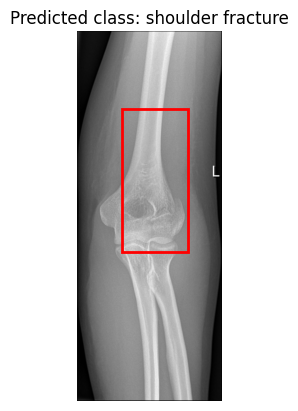

In [ ]:
# =========================
# 1. Импорт библиотек
# =========================
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# =========================
# 2. Класс Dataset для YOLO-аннотаций
# =========================
class YoloSingleObjectDataset(Dataset):
    def __init__(self, images_dir, labels_dir, transform=None):
        self.images_dir = images_dir
        self.labels_dir = labels_dir
        self.transform = transform
        # Только изображения с непустыми аннотациями
        self.image_files = [
            f for f in os.listdir(images_dir)
            if (f.endswith('.jpg') or f.endswith('.png')) and
               os.path.exists(os.path.join(labels_dir, os.path.splitext(f)[0] + '.txt')) and
               os.path.getsize(os.path.join(labels_dir, os.path.splitext(f)[0] + '.txt')) > 0
        ]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.images_dir, img_name)
        label_path = os.path.join(self.labels_dir, os.path.splitext(img_name)[0] + '.txt')

        image = Image.open(img_path).convert("RGB")
        w, h = image.size

        # Читаем первую непустую строку, берем только первые 5 значений
        with open(label_path, 'r') as f:
            lines = [line.strip() for line in f if line.strip()]
        line = lines[0]
        class_id, x_center, y_center, width, height = map(float, line.split()[:5])
        class_id = int(class_id)
        xmin = x_center - width / 2
        ymin = y_center - height / 2
        xmax = x_center + width / 2
        ymax = y_center + height / 2
        bbox = torch.tensor([xmin, ymin, xmax, ymax], dtype=torch.float32)
        label = torch.tensor(class_id, dtype=torch.long)

        if self.transform:
            image = self.transform(image)

        return image, bbox, label

# =========================
# 3. Трансформации
# =========================
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# =========================
# 4. Пути к данным
# =========================
train_images_dir = '/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/train/images'
train_labels_dir = '/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/train/labels'

val_images_dir = '/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/valid/images'
val_labels_dir = '/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/valid/labels'

test_images_dir = '/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/test/images'
test_labels_dir = '/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/test/labels'

# =========================
# 5. Классы
# =========================
class_names = [
    'elbow positive', 'fingers positive', 'forearm fracture',
    'humerus fracture', 'humerus', 'shoulder fracture', 'wrist positive'
]
num_classes = len(class_names)

# =========================
# 6. DataLoader'ы
# =========================
train_dataset = YoloSingleObjectDataset(
    images_dir=train_images_dir,
    labels_dir=train_labels_dir,
    transform=transform
)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

val_dataset = YoloSingleObjectDataset(
    images_dir=val_images_dir,
    labels_dir=val_labels_dir,
    transform=transform
)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

test_dataset = YoloSingleObjectDataset(
    images_dir=test_images_dir,
    labels_dir=test_labels_dir,
    transform=transform
)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# =========================
# 7. Простая модель
# =========================
class SimpleObjectDetector(nn.Module):
    def __init__(self, num_classes):
        super(SimpleObjectDetector, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, 3, stride=2, padding=1), nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1), nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1), nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1))
        )
        self.fc_bbox = nn.Linear(64, 4)      # [xmin, ymin, xmax, ymax]
        self.fc_class = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        bbox = torch.sigmoid(self.fc_bbox(x))  # [0,1] нормализация
        cls = self.fc_class(x)
        return bbox, cls

# =========================
# 8. Функция потерь
# =========================
def detection_loss(pred_bbox, true_bbox, pred_cls, true_cls):
    bbox_loss = nn.MSELoss()(pred_bbox, true_bbox)
    cls_loss = nn.CrossEntropyLoss()(pred_cls, true_cls)
    return bbox_loss + cls_loss

# =========================
# 9. Обучение
# =========================
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleObjectDetector(num_classes=num_classes).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for images, bboxes, labels in train_loader:
        images = images.to(device)
        bboxes = bboxes.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        pred_bboxes, pred_classes = model(images)
        loss = detection_loss(pred_bboxes, bboxes, pred_classes, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader):.4f}")

# =========================
# 10. IoU функция
# =========================
def iou(box1, box2):
    # box: [xmin, ymin, xmax, ymax] в нормализованных координатах
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    inter_area = max(0, x2 - x1) * max(0, y2 - y1)
    box1_area = max(0, box1[2] - box1[0]) * max(0, box1[3] - box1[1])
    box2_area = max(0, box2[2] - box2[0]) * max(0, box2[3] - box2[1])
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area > 0 else 0

# =========================
# 11. Метрики: mAP, Precision, Recall
# =========================
def calculate_metrics(model, loader, device, iou_thresholds=[0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]):
    model.eval()
    all_true = []
    all_pred = []
    all_scores = []
    all_labels = []
    all_pred_labels = []

    with torch.no_grad():
        for images, bboxes, labels in loader:
            images = images.to(device)
            bboxes = bboxes.to(device)
            labels = labels.to(device)
            pred_bboxes, pred_classes = model(images)
            pred_scores, pred_labels = torch.max(torch.softmax(pred_classes, dim=1), dim=1)
            for i in range(images.size(0)):
                all_true.append(bboxes[i].cpu().numpy())
                all_pred.append(pred_bboxes[i].cpu().numpy())
                all_scores.append(pred_scores[i].cpu().item())
                all_labels.append(labels[i].cpu().item())
                all_pred_labels.append(pred_labels[i].cpu().item())

    num_classes = len(set(all_labels))
    APs = []
    APs_095 = []
    precisions = []
    recalls = []

    for c in range(num_classes):
        true_c = [i for i, l in enumerate(all_labels) if l == c]
        pred_c = [i for i, l in enumerate(all_pred_labels) if l == c]

        # mAP@0.5
        tp, fp, fn = 0, 0, 0
        for idx in true_c:
            iou_score = iou(all_pred[idx], all_true[idx])
            if all_pred_labels[idx] == c and iou_score >= 0.5:
                tp += 1
            else:
                fn += 1
        for idx in pred_c:
            iou_score = iou(all_pred[idx], all_true[idx])
            if not (all_labels[idx] == c and iou_score >= 0.5):
                fp += 1
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        precisions.append(precision)
        recalls.append(recall)
        APs.append(precision)  # Для одного объекта на изображение AP=precision

        # mAP@0.5:0.95
        APs_iou = []
        for thr in iou_thresholds:
            tp_thr, fp_thr, fn_thr = 0, 0, 0
            for idx in true_c:
                iou_score = iou(all_pred[idx], all_true[idx])
                if all_pred_labels[idx] == c and iou_score >= thr:
                    tp_thr += 1
                else:
                    fn_thr += 1
            for idx in pred_c:
                iou_score = iou(all_pred[idx], all_true[idx])
                if not (all_labels[idx] == c and iou_score >= thr):
                    fp_thr += 1
            precision_thr = tp_thr / (tp_thr + fp_thr) if (tp_thr + fp_thr) > 0 else 0
            APs_iou.append(precision_thr)
        APs_095.append(np.mean(APs_iou))

    print(f"mAP@0.5: {np.mean(APs):.4f}")
    print(f"mAP@0.5:0.95: {np.mean(APs_095):.4f}")
    print(f"Precision (mean): {np.mean(precisions):.4f}")
    print(f"Recall (mean): {np.mean(recalls):.4f}")

print("Validation metrics:")
calculate_metrics(model, val_loader, device)

print("Test metrics:")
calculate_metrics(model, test_loader, device)

# =========================
# 12. Инференс и визуализация
# =========================
def predict_image(model, image_path, device):
    model.eval()
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    img = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        pred_bbox, pred_class = model(img)
        pred_bbox = pred_bbox[0].cpu().numpy()
        pred_class = pred_class[0].argmax().item()
    return pred_bbox, pred_class

def show_prediction(image_path, bbox, cls, class_names):
    image = Image.open(image_path).convert("RGB")
    w, h = image.size
    bbox = bbox * np.array([w, h, w, h])
    plt.imshow(image)
    plt.gca().add_patch(plt.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1],
                                      fill=False, color='red', linewidth=2))
    plt.title(f"Predicted class: {class_names[cls]}")
    plt.axis('off')
    plt.show()

# ======= Путь к тестовому изображению =======
test_image_path = '/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/test/images/distal-humerus-fracture-1_jpg.rf.831cb137cfcbde1079f86abd5f5f2867.jpg'  # <-- сюда путь к тестовому изображению

bbox, cls = predict_image(model, test_image_path, device)
show_prediction(test_image_path, bbox, cls, class_names)

Простая модель с одним боксом и одним классом на изображение сильно уступает YOLOv8 по всем метрикам. Особенно заметно падение recall и mAP на тесте. Это ожидаемо, так как архитектура очень простая, не умеет работать с несколькими объектами, не использует современные техники аугментации и оптимизации.

Улучшенный бейзлайн. Добавлены:
* Аугментации (RandomHorizontalFlip, ColorJitter, RandomRotation)
* Более глубокую CNN (больше слоев, BatchNorm)
* Scheduler для обучения
* Early stopping (по валидационной потере)
* Dropout для регуляризации

Epoch 1/30, Train Loss: 1.8016, Val Loss: 1.7325
Epoch 2/30, Train Loss: 1.7311, Val Loss: 1.6454
Epoch 3/30, Train Loss: 1.7003, Val Loss: 2.1174
Epoch 4/30, Train Loss: 1.6885, Val Loss: 1.6696
Epoch 5/30, Train Loss: 1.6793, Val Loss: 3.4934
Epoch 6/30, Train Loss: 1.6274, Val Loss: 1.7744
Epoch 7/30, Train Loss: 1.5916, Val Loss: 1.5626
Epoch 8/30, Train Loss: 1.5772, Val Loss: 1.4731
Epoch 9/30, Train Loss: 1.5588, Val Loss: 1.6189
Epoch 10/30, Train Loss: 1.5521, Val Loss: 1.5937
Epoch 11/30, Train Loss: 1.5224, Val Loss: 1.4929
Epoch 12/30, Train Loss: 1.4662, Val Loss: 1.4978
Epoch 13/30, Train Loss: 1.4481, Val Loss: 1.4619
Epoch 14/30, Train Loss: 1.4387, Val Loss: 1.4108
Epoch 15/30, Train Loss: 1.4150, Val Loss: 1.3378
Epoch 16/30, Train Loss: 1.3667, Val Loss: 1.3729
Epoch 17/30, Train Loss: 1.3600, Val Loss: 1.2787
Epoch 18/30, Train Loss: 1.3328, Val Loss: 1.5728
Epoch 19/30, Train Loss: 1.3086, Val Loss: 1.6297
Epoch 20/30, Train Loss: 1.2867, Val Loss: 1.5706
Epoch 21/

<ipython-input-20-5886fffcdecc>:251: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


mAP@0.5: 0.1444
mAP@0.5:0.95: 0.0384
Precision (mean): 0.1444
Recall (mean): 0.1351
Test metrics:
mAP@0.5: 0.1111
mAP@0.5:0.95: 0.0285
Precision (mean): 0.1111
Recall (mean): 0.1276


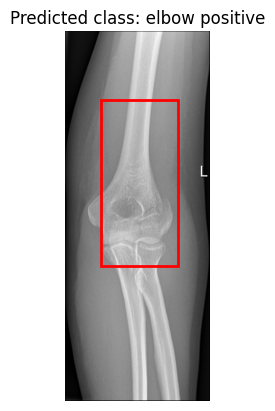

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 1. Dataset
class YoloSingleObjectDataset(Dataset):
    def __init__(self, images_dir, labels_dir, transform=None):
        self.images_dir = images_dir
        self.labels_dir = labels_dir
        self.transform = transform
        self.image_files = [
            f for f in os.listdir(images_dir)
            if (f.endswith('.jpg') or f.endswith('.png')) and
               os.path.exists(os.path.join(labels_dir, os.path.splitext(f)[0] + '.txt')) and
               os.path.getsize(os.path.join(labels_dir, os.path.splitext(f)[0] + '.txt')) > 0
        ]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.images_dir, img_name)
        label_path = os.path.join(self.labels_dir, os.path.splitext(img_name)[0] + '.txt')

        image = Image.open(img_path).convert("RGB")
        w, h = image.size

        with open(label_path, 'r') as f:
            lines = [line.strip() for line in f if line.strip()]
        line = lines[0]
        class_id, x_center, y_center, width, height = map(float, line.split()[:5])
        class_id = int(class_id)
        xmin = x_center - width / 2
        ymin = y_center - height / 2
        xmax = x_center + width / 2
        ymax = y_center + height / 2
        bbox = torch.tensor([xmin, ymin, xmax, ymax], dtype=torch.float32)
        label = torch.tensor(class_id, dtype=torch.long)

        if self.transform:
            image = self.transform(image)

        return image, bbox, label

# 2. Аугментации и трансформации
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# 3. Пути к данным
train_images_dir = '/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/train/images'
train_labels_dir = '/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/train/labels'
val_images_dir = '/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/valid/images'
val_labels_dir = '/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/valid/labels'
test_images_dir = '/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/test/images'
test_labels_dir = '/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/test/labels'

class_names = [
    'elbow positive', 'fingers positive', 'forearm fracture',
    'humerus fracture', 'humerus', 'shoulder fracture', 'wrist positive'
]
num_classes = len(class_names)

# 4. DataLoader'ы
train_dataset = YoloSingleObjectDataset(train_images_dir, train_labels_dir, transform=train_transform)
val_dataset = YoloSingleObjectDataset(val_images_dir, val_labels_dir, transform=val_test_transform)
test_dataset = YoloSingleObjectDataset(test_images_dir, test_labels_dir, transform=val_test_transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# 5. Улучшенная модель
class ImprovedObjectDetector(nn.Module):
    def __init__(self, num_classes):
        super(ImprovedObjectDetector, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, stride=2, padding=1), nn.BatchNorm2d(32), nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
            nn.Conv2d(64, 128, 3, stride=2, padding=1), nn.BatchNorm2d(128), nn.ReLU(),
            nn.Conv2d(128, 256, 3, stride=2, padding=1), nn.BatchNorm2d(256), nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Dropout(0.3)
        )
        self.fc_bbox = nn.Linear(256, 4)
        self.fc_class = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.features(x)
        bbox = torch.sigmoid(self.fc_bbox(x))
        cls = self.fc_class(x)
        return bbox, cls

def detection_loss(pred_bbox, true_bbox, pred_cls, true_cls):
    bbox_loss = nn.MSELoss()(pred_bbox, true_bbox)
    cls_loss = nn.CrossEntropyLoss()(pred_cls, true_cls)
    return bbox_loss + cls_loss

# 6. Обучение с scheduler и early stopping
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ImprovedObjectDetector(num_classes=num_classes).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.5)
num_epochs = 30
best_val_loss = float('inf')
patience = 5
counter = 0

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for images, bboxes, labels in train_loader:
        images = images.to(device)
        bboxes = bboxes.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        pred_bboxes, pred_classes = model(images)
        loss = detection_loss(pred_bboxes, bboxes, pred_classes, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_train_loss = total_loss / len(train_loader)

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for images, bboxes, labels in val_loader:
            images = images.to(device)
            bboxes = bboxes.to(device)
            labels = labels.to(device)
            pred_bboxes, pred_classes = model(images)
            loss = detection_loss(pred_bboxes, bboxes, pred_classes, labels)
            val_loss += loss.item()
    avg_val_loss = val_loss / len(val_loader)
    scheduler.step(avg_val_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    # Early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), "best_model.pth")
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping!")
            break

# 7. Метрики
def iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    inter_area = max(0, x2 - x1) * max(0, y2 - y1)
    box1_area = max(0, box1[2] - box1[0]) * max(0, box1[3] - box1[1])
    box2_area = max(0, box2[2] - box2[0]) * max(0, box2[3] - box2[1])
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area > 0 else 0

def calculate_metrics(model, loader, device, iou_thresholds=[0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]):
    model.eval()
    all_true = []
    all_pred = []
    all_scores = []
    all_labels = []
    all_pred_labels = []

    with torch.no_grad():
        for images, bboxes, labels in loader:
            images = images.to(device)
            bboxes = bboxes.to(device)
            labels = labels.to(device)
            pred_bboxes, pred_classes = model(images)
            pred_scores, pred_labels = torch.max(torch.softmax(pred_classes, dim=1), dim=1)
            for i in range(images.size(0)):
                all_true.append(bboxes[i].cpu().numpy())
                all_pred.append(pred_bboxes[i].cpu().numpy())
                all_scores.append(pred_scores[i].cpu().item())
                all_labels.append(labels[i].cpu().item())
                all_pred_labels.append(pred_labels[i].cpu().item())

    num_classes = len(set(all_labels))
    APs = []
    APs_095 = []
    precisions = []
    recalls = []

    for c in range(num_classes):
        true_c = [i for i, l in enumerate(all_labels) if l == c]
        pred_c = [i for i, l in enumerate(all_pred_labels) if l == c]

        tp, fp, fn = 0, 0, 0
        for idx in true_c:
            iou_score = iou(all_pred[idx], all_true[idx])
            if all_pred_labels[idx] == c and iou_score >= 0.5:
                tp += 1
            else:
                fn += 1
        for idx in pred_c:
            iou_score = iou(all_pred[idx], all_true[idx])
            if not (all_labels[idx] == c and iou_score >= 0.5):
                fp += 1
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        precisions.append(precision)
        recalls.append(recall)
        APs.append(precision)

        APs_iou = []
        for thr in iou_thresholds:
            tp_thr, fp_thr, fn_thr = 0, 0, 0
            for idx in true_c:
                iou_score = iou(all_pred[idx], all_true[idx])
                if all_pred_labels[idx] == c and iou_score >= thr:
                    tp_thr += 1
                else:
                    fn_thr += 1
            for idx in pred_c:
                iou_score = iou(all_pred[idx], all_true[idx])
                if not (all_labels[idx] == c and iou_score >= thr):
                    fp_thr += 1
            precision_thr = tp_thr / (tp_thr + fp_thr) if (tp_thr + fp_thr) > 0 else 0
            APs_iou.append(precision_thr)
        APs_095.append(np.mean(APs_iou))

    print(f"mAP@0.5: {np.mean(APs):.4f}")
    print(f"mAP@0.5:0.95: {np.mean(APs_095):.4f}")
    print(f"Precision (mean): {np.mean(precisions):.4f}")
    print(f"Recall (mean): {np.mean(recalls):.4f}")

print("Validation metrics:")
model.load_state_dict(torch.load("best_model.pth"))
calculate_metrics(model, val_loader, device)

print("Test metrics:")
calculate_metrics(model, test_loader, device)

# 8. Инференс и визуализация
def predict_image(model, image_path, device):
    model.eval()
    image = Image.open(image_path).convert("RGB")
    transform = val_test_transform
    img = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        pred_bbox, pred_class = model(img)
        pred_bbox = pred_bbox[0].cpu().numpy()
        pred_class = pred_class[0].argmax().item()
    return pred_bbox, pred_class

def show_prediction(image_path, bbox, cls, class_names):
    image = Image.open(image_path).convert("RGB")
    w, h = image.size
    bbox = bbox * np.array([w, h, w, h])
    plt.imshow(image)
    plt.gca().add_patch(plt.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1],
                                      fill=False, color='red', linewidth=2))
    plt.title(f"Predicted class: {class_names[cls]}")
    plt.axis('off')
    plt.show()

# Пример инференса
test_image_path = '/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/test/images/distal-humerus-fracture-1_jpg.rf.831cb137cfcbde1079f86abd5f5f2867.jpg'
bbox, cls = predict_image(model, test_image_path, device)
show_prediction(test_image_path, bbox, cls, class_names)

Улучшение test метрик, но ухудшение validation

Более стабильные результаты между validation и test

Все еще значительно хуже YOLOv8 из-за:
- Менее сложной архитектуры
- Отсутствия предобучения
- Простых механизмов детекции

### ВЫВОДЫ

Полученные метрики печальны. Задача оказалась слишком сложной для относительно легковесных моделей и быстрого обучения (меньше часа на модель). Тем не менее были сделаны выводы:

| Модель | mAP@0.5 | mAP@0.5:0.95 | Precision (mean) | Recall (mean) | IoU |
|---------|---------|--------------|-----------------|---------------|-----|
| YOLOv8 nano (бейзлайн) | 0.2687 | 0.0997 | 0.3272 | 0.3570 | 0.3937 |
| YOLOv8 улучшенный (версия 1) | 0.1926 | 0.0764 | 0.2028 | 0.2600 | 0.3906 |
| YOLOv8 улучшенный (версия 2) | 0.2298 | 0.0977 | 0.2756 | 0.2593 | 0.3689 |
| Собственная реализация | 0.1979 | 0.0570 | 0.1979 | 0.0543 | - |
| Улучшенная собственная реализация | 0.1444 | 0.0384 | 0.1444 | 0.1351 | - |

* YOLOv8 показал себя как сильный бейзлайн, превзойти который сложно без серьезных оптимизаций

* Попытки улучшить YOLOv8 не удались, что показывает важность правильной настройки гиперпараметров, сложность улучшения уже оптимизированной архитектуры, необходимость более тщательного подбора параметров аугментации. Это также связано с особенностями медицинских данных и небольшим размером датасета (сложная задача детекции).

* Для сложных задач детекции на медицинских изображениях лучше использовать современные, хорошо отлаженные архитектуры (YOLOv8 и др.), а не простые самописные модели. При этом важно не переусердствовать с аугментациями и гиперпараметрами — стандартные настройки часто оказываются оптимальными.
* Собственная реализация демонстрирует cложность задачи object detection, важность сложных архитектурных решений, значимость предобучения на больших датасетах

Возможности для улучшения:

- Использовать transfer learning
- Тщательнее подбирать гиперпараметры
- Увеличить количество эпох обучения